## Chapter 07 딥러닝을 시작합니다 ▶️패션 럭키백을 판매합니다!
#### 07-3 신경망 모델 훈련 ▶️인경 신경망 모델 훈련의 모범 사례 학습하기 

In [1]:
## 데이터셋 준비 
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split

## train, validation set을 구분 
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

train_scaled = train_input / 255
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

print(train_scaled.shape, val_scaled.shape, train_target.shape, val_target.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


----
#### 1. history 객체에 저장된 로그값으로, epochs 횟수에 따른 loss/accurcy 변화를 관찰하여 최적의 epochs수를 찾는다. 

In [2]:
## model making function : model_fn()에 a_layer 변수로 층을 추가하면, 은닉층 뒤로 레이어 추가 
def model_fn(a_layer = None): 
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))
    if a_layer: 
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model 

In [3]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5)

history.history.keys()

Epoch 1/5
1500/1500 [==============================] - 2s 907us/step - loss: 0.5333 - accuracy: 0.8123
Epoch 2/5
1500/1500 [==============================] - 1s 887us/step - loss: 0.3925 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 1s 883us/step - loss: 0.3550 - accuracy: 0.8724
Epoch 4/5
1500/1500 [==============================] - 1s 887us/step - loss: 0.3333 - accuracy: 0.8801
Epoch 5/5
1500/1500 [==============================] - 1s 897us/step - loss: 0.3199 - accuracy: 0.8848


dict_keys(['loss', 'accuracy'])

- history 객체에 loss와 accuracy가 저장되어 있음을 알수 있다. 

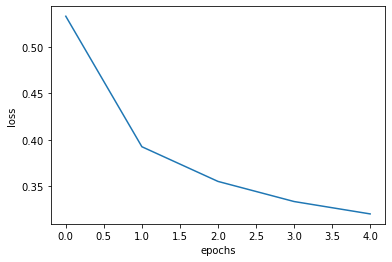

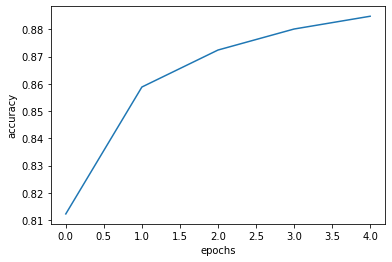

In [5]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 - 1s - loss: 0.5353 - accuracy: 0.8100 - 1s/epoch - 938us/step
Epoch 2/20
1500/1500 - 1s - loss: 0.3935 - accuracy: 0.8595 - 1s/epoch - 801us/step
Epoch 3/20
1500/1500 - 1s - loss: 0.3569 - accuracy: 0.8711 - 1s/epoch - 801us/step
Epoch 4/20
1500/1500 - 1s - loss: 0.3335 - accuracy: 0.8807 - 1s/epoch - 804us/step
Epoch 5/20
1500/1500 - 1s - loss: 0.3189 - accuracy: 0.8861 - 1s/epoch - 796us/step
Epoch 6/20
1500/1500 - 1s - loss: 0.3063 - accuracy: 0.8910 - 1s/epoch - 798us/step
Epoch 7/20
1500/1500 - 1s - loss: 0.2985 - accuracy: 0.8940 - 1s/epoch - 800us/step
Epoch 8/20
1500/1500 - 1s - loss: 0.2870 - accuracy: 0.8986 - 1s/epoch - 809us/step
Epoch 9/20
1500/1500 - 1s - loss: 0.2813 - accuracy: 0.9028 - 1s/epoch - 812us/step
Epoch 10/20
1500/1500 - 1s - loss: 0.2756 - accuracy: 0.9021 - 1s/epoch - 807us/step
Epoch 11/20
1500/1500 - 1s - loss: 0.2702 - accuracy: 0.9061 - 1s/epoch - 809us/step
Epoch 12/20
1500/1500 - 1s - loss: 0.2669 - accuracy: 0.9080 - 1s/epoch - 

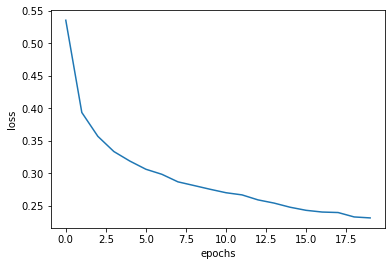

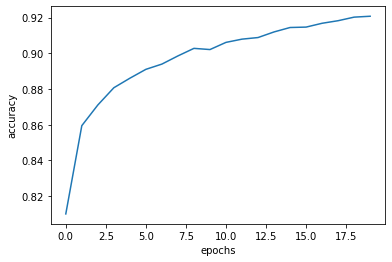

In [6]:
## epochs = 20일때 (*앞서 5회의 훈련이 진행되었으므로, 모델을 초기화 한다.)
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2) #verbose 훈련과정 표시 옵션 : 0, 1, 2 -> 생략, 표시, 숫자만 표시

plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

----
#### 2. Overfitting 피하기 
- epochs 증가에 따라 손실감소&정확도 증가, 반면 overfitting 또한 증가 위험 존재  
- -> train / validation set의 결과 비교, drop-out 적용  

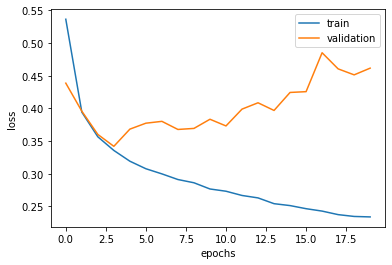

In [7]:
## model fit에서 매개변수로 validation_data 지정 
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target)) 
#verbose 훈련과정 표시 옵션 : 0, 1, 2 -> 생략, 표시, 숫자만 표시

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

- epochs = 5부터 검증셋의 loss 증가, 전형적인 overfitting 
- optimizer 변경으로도 overfitting을 어느정도 해결할 수 있음 

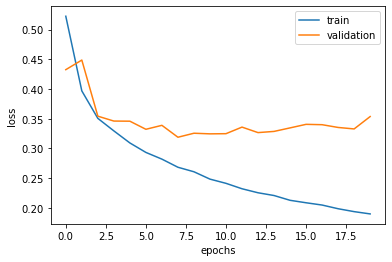

In [8]:
model = model_fn()
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target)) 
#verbose 훈련과정 표시 옵션 : 0, 1, 2 -> 생략, 표시, 숫자만 표시

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

- 가장 좋은 방법은 dropout 적용 : 노드(뉴런)을 매개변수에서 지정된 갯수만큼 랜덤하게 꺼버린다. 
- 특정 노드에 대한 과한 의존을 막고, 하나의 모델로써 앙상블 효과를 얻을 수 있다. 
- 드롭아웃 적용된 노드는 입력값을 그대로 바이패스 한다. 따라서 파라미터 갯수 변화는 없다. 
- 드롭아웃은 훈련에만 적용됨. 검증/평가에는 적용되지 않는다. 

In [9]:
## 모델생성 함수에 30% 드롭아웃을 적용하는 레이어를 추가 
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


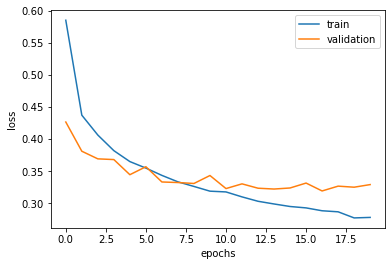

In [10]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target)) 
#verbose 훈련과정 표시 옵션 : 0, 1, 2 -> 생략, 표시, 숫자만 표시

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'])
plt.show()

- dropout 적용결과 epochs = 10 부터 overfitting이 제어되고 있음 --> best model's epoch = 10회 
----

#### 3. 최적 모델의 저장과 콜백 
- model.save(), model.load()를 사용하여 훈련된 모델을 저장하고 다시 불러올 수 있다. 
- callback과 early stopping을 사용하여 loss가 최소일때 자동으로 훈련을 종료할 수 있다. 

In [11]:
## 모델 훈련 후 저장하기 
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))
model.save('model.h5')

In [12]:
## 저장한 모델 불러와 평가하기 
model = keras.models.load_model('model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 730us/step - loss: 0.3518 - accuracy: 0.8770


[0.3517727851867676, 0.8769999742507935]

In [13]:
## keras.callbacks.ModelCheckpoint() : best model을 저장한다. 
## keras.callbacks.EarlyStopping() : ModelCheckpoint()와 함께 사용되며, loss가 다시 증가할때 epochs를 중단한다. 

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

## patience = k : loss가 연속 k번 증가하는 경우 훈련을 중단하고, loss가 증가하기 전인 best 상태를 저장한다. 
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target),
                   callbacks = [checkpoint_cb, early_stopping_cb])

print('best epochs =', early_stopping_cb.stopped_epoch)

best epochs = 8


In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 714us/step - loss: 0.3265 - accuracy: 0.8799


[0.32646843791007996, 0.8799166679382324]

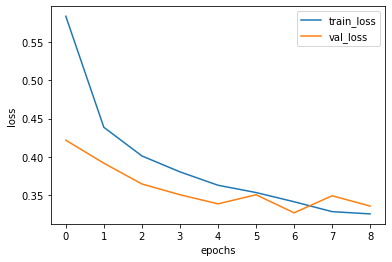

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()